#### Water-mass Methods Package
##### BSP Tutorial by Taimoor Sohail

This tutorial script walks the user through the functionality of the Binary Space Partitioning Code within the WM_Methods package

In [2]:
## Import the BSP component of the WM_Methods package
from WM_Methods import BSP
## Other required packages for calculations and plotting
import numpy as np
import matplotlib.pyplot as plt

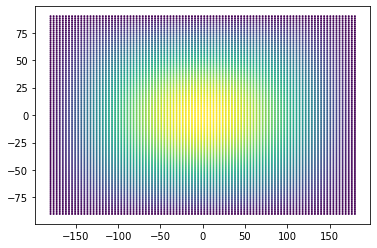

In [4]:
'''
Define a set of 1D (important: must be 1D or flattened arrays) that make up the 2D grid
x: the x co-ordinates of each point
y: the y co-ordinates of each point
z: the distribution at each (x,y) point
'''

## In this tutorial, we choose the simplest example,a regular x,y grid with sinusoidal distribution weight. 
x = np.repeat(np.linspace(-180,180,100)[:,np.newaxis], 100,axis=-1).flatten()
y = np.repeat(np.linspace(-90,90,100)[np.newaxis,:], 100,axis=0).flatten()
v = np.repeat(np.cos(np.linspace(np.pi*1.5,2.5*np.pi,100))[:,np.newaxis], 100,axis=-1).flatten()*\
    np.repeat(np.cos(np.linspace(np.pi*1.5,2.5*np.pi,100))[np.newaxis,:], 100,axis=0).flatten()

## Plot the scatter plot of the volume distribution 
plt.scatter(x,y,1,v)
plt.show()

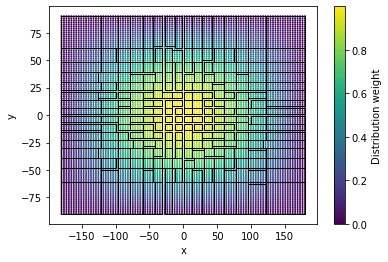

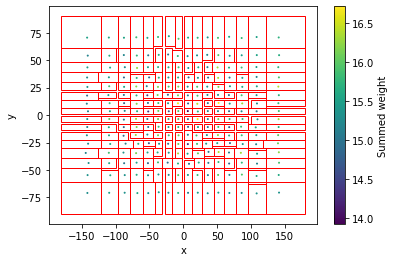

In [12]:

## Define the number of BSP bins to output, where number = 2**tree_depth
tree_depth = 8
# Note: if 2**depth approaches the sample size, the code will not work as an equal volume constraint will become impossible!

'''
Now, we explore the 3 functions built into the BSP code. 
1) calc: This function calculates the BSP bins for any 2D distribution. We input the x,y, and v parameters, as well as the 
tree depth, first axis to split orthogonal to, and any diagnostics we want to output. 
We are able to output up to 12 diagnostics - 6 summed variables for each bin, and 6 meaned variables for each bin.
The weight over which the mean is calculated can also be different to the distribution weight, v.

2) split: The `calc` function outputs a large nested list, which needs to be split into the constituent diagnostics of interest. 
Due to the recursive nature of the `calc` function, this splitting must be accomplished in a second function, `split`.
The output of the `split` function is a dictionary with BSP box boundaries, summed variables and meaned variables. 

3) draw: The `draw` function allows us to visualise the BSP boundaries on top of the original distribution. 
'''

## Calculate the BSP bins
BSP_out = BSP.calc(x,y, v, depth=tree_depth, axis=1, mean=[x,y,v],sum=[v],weight=v)
# Split the output into constituent diagnostics
vals = BSP.split(BSP_out, depth=tree_depth)
## Draw the BSP bins onto original grid
BSP.draw(x,y,v,vals['bounding_box'],'black', depth=tree_depth)
cbar = plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
cbar.set_label('Distribution weight')
plt.show()

BSP.draw(vals['meaned_vals'][:,0],vals['meaned_vals'][:,1],vals['summed_vals'],vals['bounding_box'],'red', depth=tree_depth, cmap=plt.cm.viridis)
cbar = plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
cbar.set_label('Summed weight')
plt.show()